# CSE 5243 - Introduction to Data Mining
## Homework 1: Exploratory Data Analysis
- Semester: Fall 2022
- Instructor: Greg Ryslik
- Student Name: Karthik Prabhu  
- name.#: karthikprabhu22@gmail.com

Hi TA,
I am not enrolled in this course (I asked Greg if I could audit it). I still wanted to submit this homework. Sorry for the extra work. 
***

***
# Section 0: Setup
- Add any needed imports, helper functions, etc., here.
***

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import statsmodels.api as sm
from sklearn.metrics import roc_curve
from sklearn.feature_selection import chi2
from sklearn.preprocessing import QuantileTransformer

sns.set_style("whitegrid")


***
# Section: 1 - Domain Understanding
- Write a few paragraphs providing an overview of the data. Some questions you should consider are: Where did the data come from? What do the rows represent? Why and how was the data collected? Who might use this data? What types of questions might users be able to analyze with this data?
- You should review the dataset description information on the webpage to get some context. Of course you will only have limited background on this topic (and you are not expected to become an expert), so do your best to imagine the context for the work, making reasonable assumptions as appropriate. At this stage, you are not analyzing individual attributes, but discussing the dataset in aggregate.
***

The dataset used for this project is Pima Indians Diabetes Dataset from Kaggle. This original dataset has been provided by the National Institute of Diabetes and Digestive and Kidney Diseases. Both dataset and code for this project are available on my GitHub repository. This dataset is used to predict whether a patient is likely to get diabetes based on the input parameters like Age, Glucose, Blood pressure, Insulin, BMI, etc. Each row in the data provides relevant information about the patient. It is to be noted that all patients here are females minimum 21 years old belonging to Pima Indian heritage.

***
# Section: 2 - Data Understanding
***
 Perform exploratory data analysis of the dataset by looking at individual attributes and/or combinations of attributes. You should focus on identifying and describing interesting observations and insights that you might uncover from the data.
- You should not simply provide the basic EDA information for all attributes in the data (although that's a good first step!). Instead, you should focus on those that are more interesting or important, and provide some discussion of what you observe. Pay particular attention to potentially interesting bivariate (two-variable) relationships, as well as the relationship between each attribute and the outcome.
*****

In [2]:
#Importing the csv file that contains the data and display first 5 entries
df_raw = pd.read_csv('diabetes_hw_data_3494.csv')
df_raw.head()


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,5.0,144,82.0,26.0,285.0,32.0,0.452,58.0,1
1,5.0,137,108.0,0.0,0.0,48.8,0.227,37.0,1
2,5.0,109,75.0,26.0,0.0,36.0,0.546,60.0,0
3,3.0,113,50.0,10.0,85.0,29.5,0.626,25.0,0
4,2.0,96,68.0,13.0,49.0,21.1,0.647,26.0,0


In [3]:
#Not sure why Pregnancies was type float. Changing it to int for now.
df_raw.Pregnancies = df_raw.Pregnancies.astype(int)


In [4]:
#Check for missing data
df_raw.isnull().values.any()

False

Even though there are no null or NaN values, there are plenty of 0s in the dataset which doesn't make sense for variables like Glucose or SkinThickness etc. So these are in fact missing values.

In [5]:
df_raw['Glucose'] = df_raw['Glucose'].replace(0, np.nan)
df_raw['BloodPressure'] = df_raw['BloodPressure'].replace(0, np.nan)
df_raw['SkinThickness'] = df_raw['SkinThickness'].replace(0, np.nan)
df_raw['Insulin'] = df_raw['Insulin'].replace(0, np.nan)
df_raw['BMI'] = df_raw['BMI'].replace(0, np.nan)

***
## Section: 2.1 - Describe the meaning and type of data for each feature.
***

Features of the dataset:
The dataset contains 768 entries with 9 features set. All the participants of this study are women above the age of 21 who belong to the Pima Indian community. The detailed description of all the features are as follows:

Pregnancies: indicates the number of pregnancies

Glucose: indicates the plasma glucose concentration at 2 hours in a  Oral Glucose Tolerance Test (GTT)

Blood Pressure: indicates diastolic blood pressure in mm Hg

Skin Thickness: indicates triceps skinfold thickness in mm

Insulin: indicates insulin in $\mu U$/mL

BMI: indicates the body mass index in kg/m2

Diabetes Pedigree Function: indicates the function which scores likelihood of diabetes based on family history

Age: indicates the age of the person

Outcome: indicates if the patient had a diabetes or not (1=yes, 0=no)


In [6]:
# The datatype can be got by this function
df_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 783 entries, 0 to 782
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               783 non-null    int32  
 1   Glucose                   778 non-null    float64
 2   BloodPressure             748 non-null    float64
 3   SkinThickness             551 non-null    float64
 4   Insulin                   403 non-null    float64
 5   BMI                       772 non-null    float64
 6   DiabetesPedigreeFunction  783 non-null    float64
 7   Age                       783 non-null    float64
 8   Outcome                   783 non-null    int64  
dtypes: float64(7), int32(1), int64(1)
memory usage: 52.1 KB


***
## Section: 2.2 - Provide basic statistics for the attributes.
- For example: counts, percentiles, mean, median, standard deviation. The statistics should be relevant for the type of attribute.
***

In [7]:
#This function gives us the requires stats listed above for each feature
df_raw.describe()


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,783.000000,778.000000,748.000000,551.000000,403.000000,772.000000,783.000000,783.000000,783.000000
mean,3.841635,122.060411,74.036096,29.796733,160.801489,32.821503,0.470271,34.444444,0.348659
std,3.366824,30.925579,28.020456,15.341876,127.515994,10.868808,0.330093,25.167961,0.476850
min,0.000000,44.000000,24.000000,7.000000,14.000000,18.200000,0.078000,21.000000,0.000000
25%,1.000000,100.000000,64.000000,22.000000,77.500000,27.500000,0.242000,24.000000,0.000000
50%,3.000000,117.000000,72.000000,29.000000,126.000000,32.350000,0.370000,29.000000,0.000000
75%,6.000000,141.750000,80.000000,36.000000,192.000000,36.725000,0.625000,41.000000,1.000000
max,17.000000,199.000000,504.000000,273.000000,846.000000,264.600000,2.420000,567.000000,1.000000


In [8]:
#Let's see if the stats for the features vary a lot when you group the dataset by the outcome
df0_raw, df1_raw = [x for _, x in df_raw.groupby('Outcome')]
df0_raw.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,510.000000,507.000000,491.000000,369.000000,271.000000,501.000000,510.000000,510.000000,510.0
mean,3.276471,110.907298,71.706721,28.243902,136.239852,30.933733,0.430641,32.939216,0.0
std,3.002297,25.264554,21.194424,17.097073,111.492225,6.594995,0.298248,30.034463,0.0
min,0.000000,44.000000,24.000000,7.000000,15.000000,18.200000,0.078000,21.000000,0.0
25%,1.000000,93.000000,62.000000,19.000000,66.000000,25.800000,0.230250,23.000000,0.0
50%,2.000000,107.000000,70.000000,27.000000,105.000000,30.100000,0.337000,27.000000,0.0
75%,5.000000,125.000000,78.000000,34.000000,167.000000,35.400000,0.571750,37.000000,0.0
max,13.000000,197.000000,455.000000,273.000000,744.000000,57.300000,2.329000,567.000000,0.0


In [9]:
df1_raw.describe()


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,273.000000,271.000000,257.000000,182.000000,132.000000,271.000000,273.000000,273.000000,273.0
mean,4.897436,142.926199,78.486381,32.945055,211.227273,36.311439,0.544304,37.256410,1.0
std,3.742212,29.757198,37.429110,10.297092,143.065703,15.425558,0.371969,10.993322,0.0
min,0.000000,78.000000,30.000000,7.000000,14.000000,22.900000,0.088000,21.000000,1.0
25%,2.000000,119.500000,68.000000,27.000000,128.500000,30.900000,0.260000,28.000000,1.0
50%,4.000000,141.000000,76.000000,32.000000,169.500000,34.300000,0.441000,36.000000,1.0
75%,8.000000,168.000000,84.000000,39.000000,241.250000,39.050000,0.722000,44.000000,1.0
max,17.000000,199.000000,504.000000,99.000000,846.000000,264.600000,2.420000,70.000000,1.0


It seems like the mean of both Insulin and Glucose are higher for cases with Outcome=1

In [10]:
predictors_raw = df_raw[["Pregnancies", "Glucose", "BloodPressure", "SkinThickness",
                 "Insulin", "BMI", "DiabetesPedigreeFunction", "Age"]]

outcome_raw = df_raw[["Outcome"]]


***
## Section: 2.3 - Visualize the most important or interesting attributes using appropriate techniques.
- For each visualization, provide an interpretation explaining why it is appropriate or interesting. What does each visualization tell us?
***

array([[<AxesSubplot:ylabel='Density'>, <AxesSubplot:ylabel='Density'>],
       [<AxesSubplot:ylabel='Density'>, <AxesSubplot:ylabel='Density'>],
       [<AxesSubplot:ylabel='Density'>, <AxesSubplot:ylabel='Density'>],
       [<AxesSubplot:ylabel='Density'>, <AxesSubplot:ylabel='Density'>]],
      dtype=object)

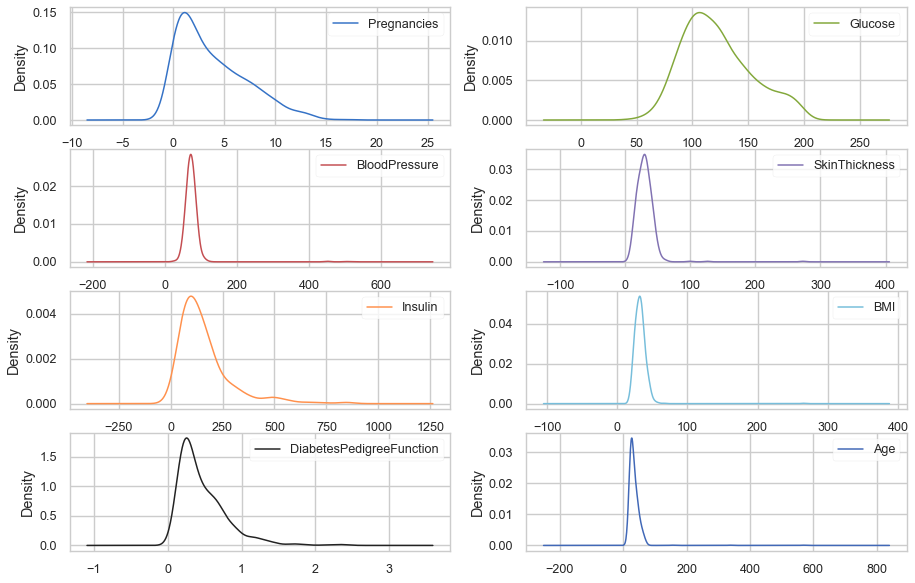

In [11]:
#First we look at the density plots for the various predictors and see if they are normally distributed or are there any bimodal features etc
predictors_raw.plot(subplots=True, layout=(
    4, 2), figsize=(15, 10), kind="density", sharex=False)


***
## Section: 2.4 - Verify data quality: explain any missing values, duplicate data, or outliers.
- What, if anything, do you need to do about these? Be specific.
***

### Missing values

In [12]:
#Missing data
missing_data = df_raw[df_raw.isnull().any(axis=1)]
print("Rows with missing entries :")

# Print the resultant Dataframe
missing_data


Rows with missing entries :


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
1,5,137.0,108.0,NaN,NaN,48.8,0.227,37.0,1
2,5,109.0,75.0,26.0,NaN,36.0,0.546,60.0,0
7,4,189.0,110.0,31.0,NaN,28.5,0.680,37.0,0
9,7,179.0,95.0,31.0,NaN,34.2,0.164,60.0,0
10,4,134.0,72.0,NaN,NaN,23.8,0.277,60.0,1
...,...,...,...,...,...,...,...,...,...
775,10,101.0,86.0,37.0,NaN,45.6,1.136,38.0,1
777,5,104.0,74.0,NaN,NaN,28.8,0.153,48.0,0
780,0,138.0,NaN,NaN,NaN,36.3,0.933,25.0,1
781,4,183.0,NaN,NaN,NaN,28.4,0.212,36.0,1


We see that there are 382 rows with at least one feature missing. Clearly, deleting those rows is not an option.
The other options are either going ahead with missing features and making sure our algorithms can handle missing values or data imputation where we replace the missing values by the mean or median etc

### Duplicate values

In [13]:
#Dupliate data
duplicate = df_raw[df_raw.duplicated()]

print("Duplicate Rows :")

# Print the resultant Dataframe
duplicate


Duplicate Rows :


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
218,8,188.0,78.0,NaN,NaN,47.9,0.137,43.0,1
226,11,143.0,94.0,33.0,146.0,36.6,0.254,51.0,1
399,5,117.0,92.0,NaN,NaN,34.1,0.337,38.0,0
408,1,193.0,50.0,16.0,375.0,25.9,0.655,24.0,0
416,4,110.0,76.0,20.0,100.0,28.4,0.118,27.0,0
462,1,121.0,78.0,39.0,74.0,39.0,0.261,28.0,0
486,5,168.0,64.0,NaN,NaN,32.9,0.135,41.0,1
521,0,100.0,88.0,60.0,110.0,46.8,0.962,31.0,0
543,2,100.0,64.0,23.0,NaN,29.7,0.368,21.0,0
576,1,193.0,50.0,16.0,375.0,25.9,0.655,24.0,0


We see that there are around 15 duplicate values. Now, these might be coincidental or actual duplicates. We could delete them as it wouldn't diminish our dataset too much.

### Outliers

Pregnancies                     AxesSubplot(0.125,0.71587;0.352273x0.16413)
Glucose                      AxesSubplot(0.547727,0.71587;0.352273x0.16413)
BloodPressure                  AxesSubplot(0.125,0.518913;0.352273x0.16413)
SkinThickness               AxesSubplot(0.547727,0.518913;0.352273x0.16413)
Insulin                        AxesSubplot(0.125,0.321957;0.352273x0.16413)
BMI                         AxesSubplot(0.547727,0.321957;0.352273x0.16413)
DiabetesPedigreeFunction          AxesSubplot(0.125,0.125;0.352273x0.16413)
Age                            AxesSubplot(0.547727,0.125;0.352273x0.16413)
dtype: object

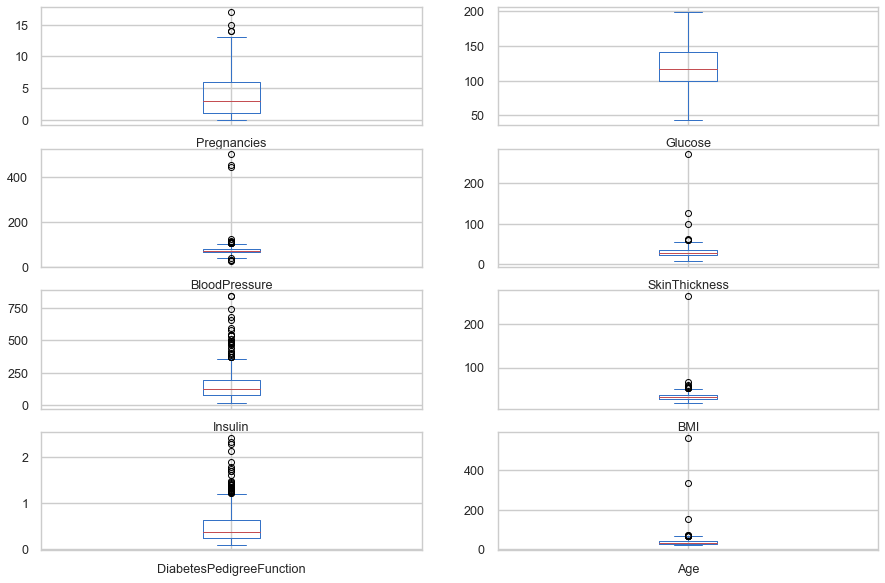

In [14]:
predictors_raw.plot(subplots = True, layout = (4, 2), figsize = (15, 10), kind = "box", sharex = False)


We see that there are plenty of outliers esp in Insulin, skin thickness etc. These values clearly do not make sense and are likely due to human/machine errors. We could impute these values using mean/median etc

***
## Section: 2.5 - Explore the relationships among the features, excluding the outcome attribute.
- Use scatter plots, correlation matrices, cross-tabulations, group-wise averages, or other appropriate techniques. Explain and interpret any interesting relationships.
***

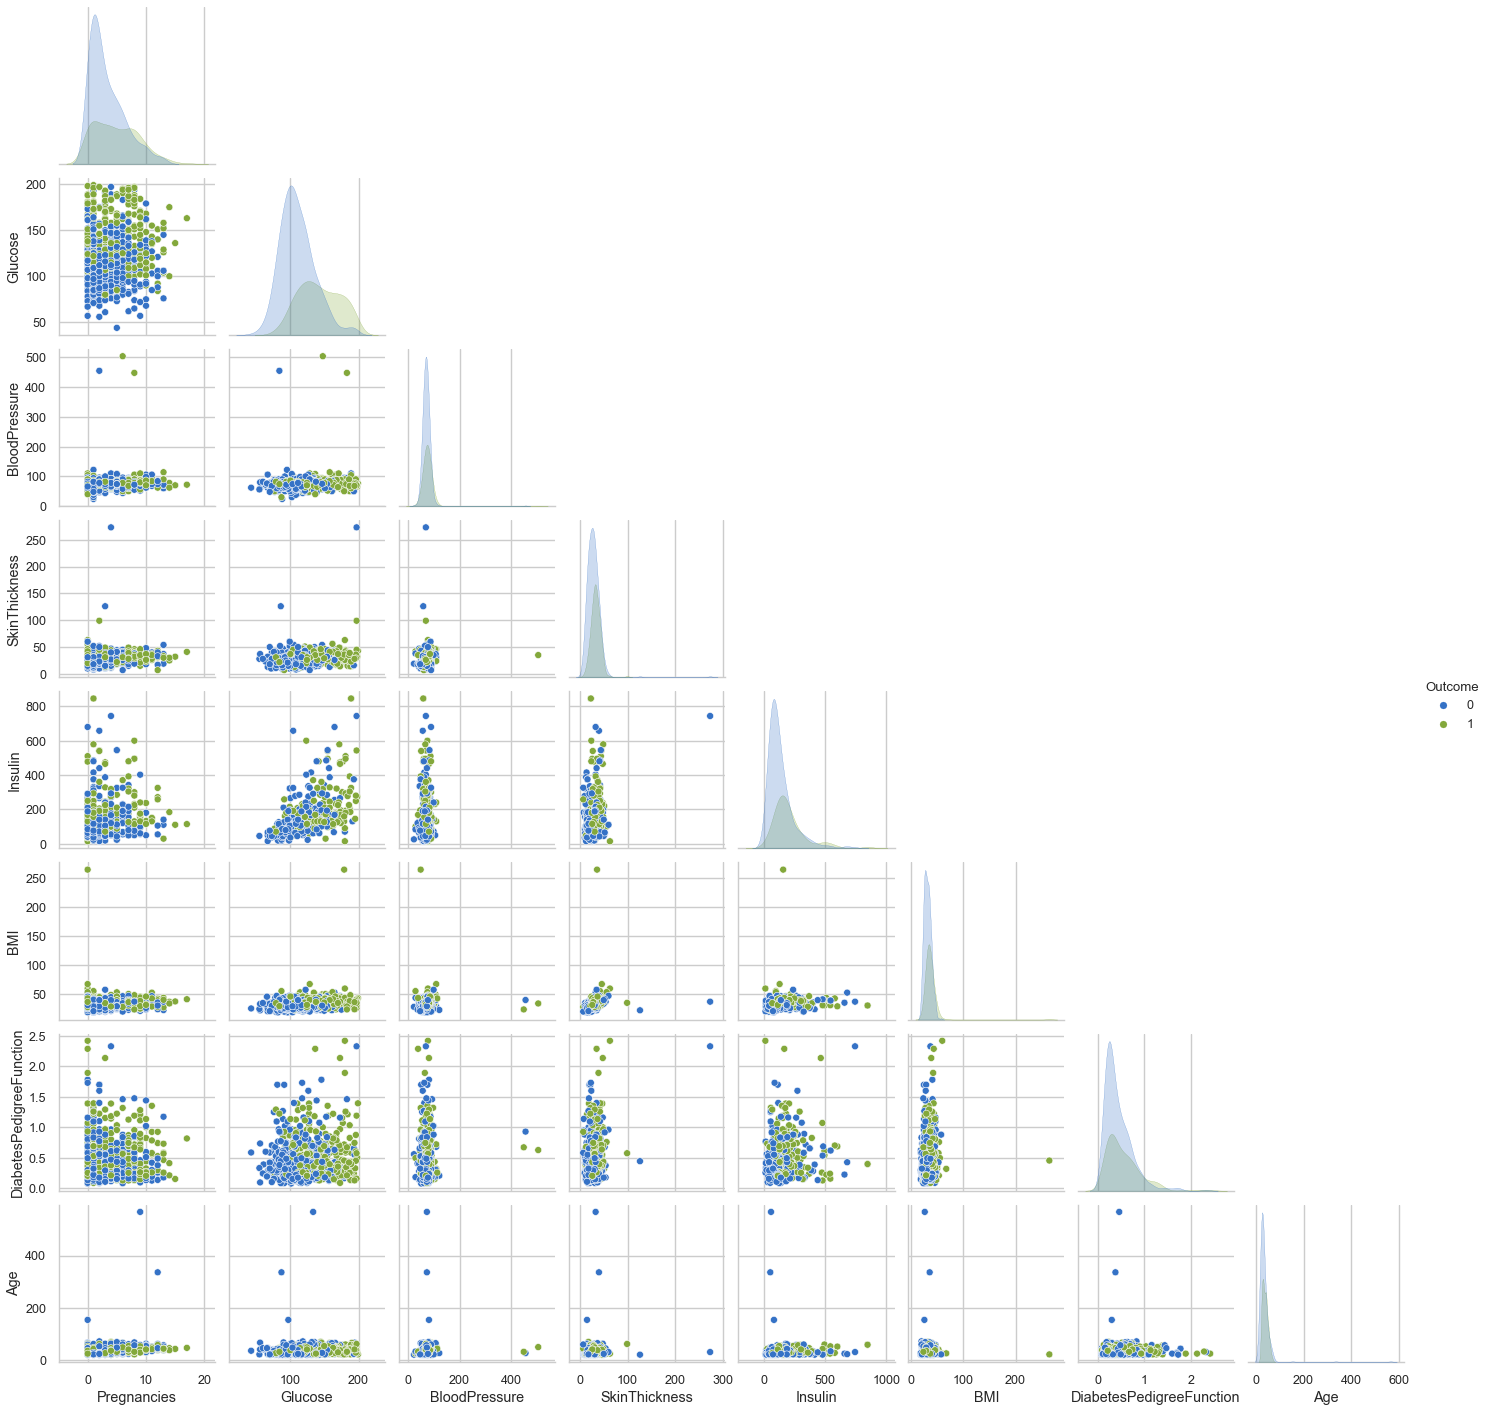

In [15]:
sns.pairplot(df_raw,hue='Outcome', diag_kind='kde', corner=True)

We see clear correlation between Insulin and Glucose, between BMI and skin thickness. Both of which are not surprising.

<AxesSubplot:>

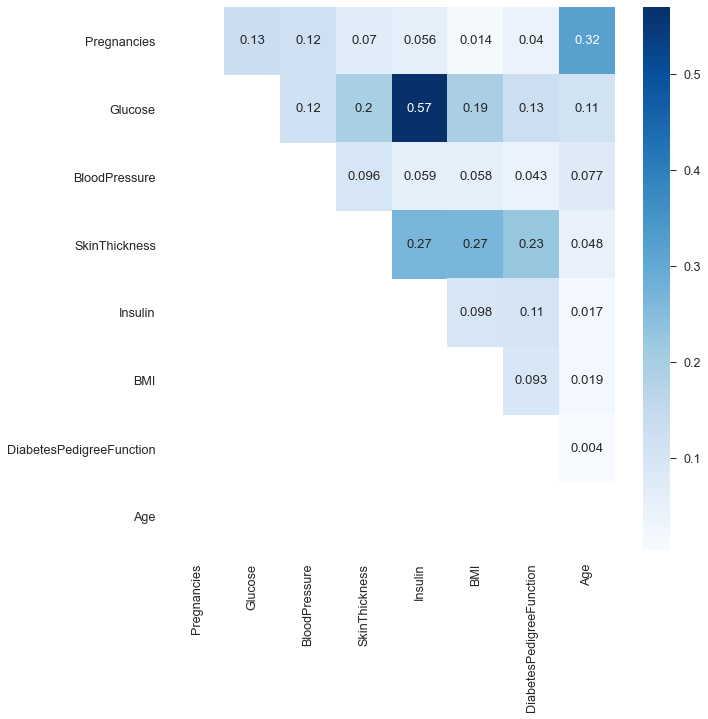

In [16]:
#Create correlation matrix
corr_matrix = predictors_raw.corr().abs()

#Select upper triangle of correlation matrix
upper = corr_matrix.where(
    np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))

plt.figure(figsize=(10, 10))
sns.heatmap(upper, annot=True, cmap='Blues')


We observe similar correlations as noticed before. Another prominent correlation is between Age and pregnancies which is also expected.

***
## Section: 2.6 - Identify and explain any interesting relationships between the outcome attribute and the other attributes.
- You may refer to earlier visualizations or create new ones. Feel free to look at $\chi^2$ values and other statsitics as you deem appropriate. 

Here I am looking at p-values of various predictor variables and seeing if the outcome is independent of any of them. If the p-value is greater than 0.05 we consider that predictor to be independent.
Credits: https://www.geeksforgeeks.org/ml-chi-square-test-for-feature-selection/

***

In [17]:
df_raw_nonan = df_raw.dropna()
from sklearn.feature_selection import chi2
chi_scores = chi2(df_raw_nonan[['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness',
                                'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age']], df_raw_nonan['Outcome'])


In [18]:
chi_scores


(array([  85.75059502,  803.59170999,   32.70813156,   63.95153295,
        3037.53499093,   84.11261552,    3.6522749 ,   54.8041479 ]),
 array([2.04122816e-020, 8.93636485e-177, 1.07088285e-008, 1.27518048e-015,
        0.00000000e+000, 4.67378796e-020, 5.59926827e-002, 1.33159439e-013]))

In [19]:
p_values = pd.Series(chi_scores[1], index=predictors_raw.columns)
p_values.sort_values(ascending=False, inplace=True)


<AxesSubplot:>

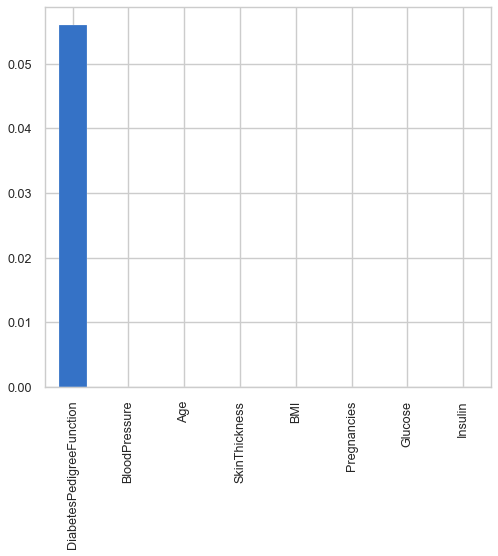

In [20]:
p_values.plot.bar()


It seems like the Diabetes Pedigree Function does not affect the Outcome much.

***
# Section: 3 - Data Analysis
- Based on the insights gleaned in the data understanding step above, let's do some logistic regression modeling! 
- One of the final outputs should be a logistic regression model and interpration of the results.
***

***
## Section: 3.1. Data Prep
- Let's assume all duplicate records are in fact false and remove them. 
- Outliers can be handled in a variety of ways including removing the observation, setting them to NA's (if you're algorithm allows missing data) or imputation -- just to name a few. Let's change all the outliers to the median value of that feature WITHIN the specfic outcome group.  When you compute the median, be sure to exclude the missing values.
  > Why would we want to change it to the median value as opposed to the mean?
- There's a variety of ways to handle missing data. Two of them is to either drop the entire record or impute the missing value. For this scenario we'll impute the record based upon the average value for that feature WITHIN that specific outcome group.

  > Bonus points: When you fit the logistic regression, what might this imputation operation lead to in your conclusions when analyzing the logistic regression output? Be sure to consider the case for both outliers and missing data. How can yo verify that any erroneous conclusions are discovered eventually?

### Output:
- How any duplicate records are were there? Show a dataframe of which records were removed.


- How many outliers were found? Show what they were and what value they were changed to.


- Show the mean, median and std deviation of each feature after you remove duplicate records, adjust the outliers and fixed the missing values.


- Have any of the critical visualizations or relationships you discovered in section 2 changed?

***

### Duplicates

In [21]:
#Pick out the duplicates
duplicate = df_raw[df_raw.duplicated()]

print("Duplicate Rows : ",len(duplicate))

# Print the resultant Dataframe
duplicate


Duplicate Rows :  15


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
218,8,188.0,78.0,NaN,NaN,47.9,0.137,43.0,1
226,11,143.0,94.0,33.0,146.0,36.6,0.254,51.0,1
399,5,117.0,92.0,NaN,NaN,34.1,0.337,38.0,0
408,1,193.0,50.0,16.0,375.0,25.9,0.655,24.0,0
416,4,110.0,76.0,20.0,100.0,28.4,0.118,27.0,0
462,1,121.0,78.0,39.0,74.0,39.0,0.261,28.0,0
486,5,168.0,64.0,NaN,NaN,32.9,0.135,41.0,1
521,0,100.0,88.0,60.0,110.0,46.8,0.962,31.0,0
543,2,100.0,64.0,23.0,NaN,29.7,0.368,21.0,0
576,1,193.0,50.0,16.0,375.0,25.9,0.655,24.0,0


We had noted this before.

### Outliers and missing values

Credits:

https://devanshu125.github.io/diabetes/

https://www.analyticsvidhya.com/blog/2021/07/diabetes-prediction-with-pycaret/

This dataset contains zeros and some invalid values i.e., values that are logically impossible like glucose, insulin, BMI, or blood pressure value of 0. It is possible to either drop and ignore such inconsistent values while cleaning the dataset or replacing them with a more appropriate range of values. Since there are many zeros in columns ‘Skin Thickness’ and ‘Insulin levels’; deleting those would result in a much smaller dataset. Hence, for this project, let us replace the NaN values with the median so that the size of the dataset stays the same.

In descriptive statistics, the interquartile range(IQR) is a measure of statistical dispersion, which is the spread of the data. The interquartile range is often used to find outliers in data. Outliers here are defined as observations that fall below Q1 − 1.5 IQR or above Q3 + 1.5 IQR. In a boxplot, the highest and lowest occurring value within this limit are indicated by whiskers of the box


Pregnancies                     AxesSubplot(0.125,0.71587;0.352273x0.16413)
Glucose                      AxesSubplot(0.547727,0.71587;0.352273x0.16413)
BloodPressure                  AxesSubplot(0.125,0.518913;0.352273x0.16413)
SkinThickness               AxesSubplot(0.547727,0.518913;0.352273x0.16413)
Insulin                        AxesSubplot(0.125,0.321957;0.352273x0.16413)
BMI                         AxesSubplot(0.547727,0.321957;0.352273x0.16413)
DiabetesPedigreeFunction          AxesSubplot(0.125,0.125;0.352273x0.16413)
Age                            AxesSubplot(0.547727,0.125;0.352273x0.16413)
dtype: object

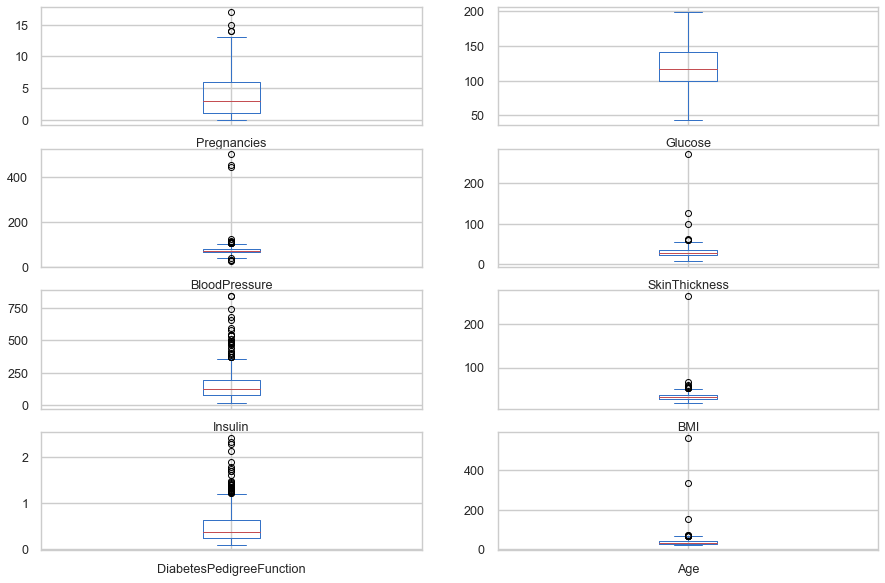

In [22]:
#Box plot before imputation
predictors_raw.plot(subplots = True, layout = (4, 2), figsize = (15, 10), kind = "box", sharex = False)

We intend to replace the outliers by the median of the feature within that specific outcome group. 

In [23]:
# Let's group the dataset by the outcome first
df0_raw, df1_raw = [x for _, x in df_raw.groupby('Outcome')]

In [24]:
# Handling Outlier using IQR
Q1 = (df0_raw[df0_raw.columns]).quantile(0.25)
Q3 = (df0_raw[df0_raw.columns]).quantile(0.75)
IQR = Q3 - Q1
maximum = Q3 + (1.5*IQR)
minimum = Q1 - (1.5*IQR)

df0_mmm = pd.DataFrame(np.array([minimum, (df0_raw[df0_raw.columns]).quantile(
    0.5), maximum]), columns=df_raw.columns, index=["Minimum cutoff", "Median", "Maximum cutoff"])
more_than = (df0_raw > maximum)
lower_than = (df0_raw < minimum)
df0_raw = df0_raw.mask(more_than, df0_raw.median(), axis=1)
df0_raw = df0_raw.mask(lower_than, df0_raw.median(), axis=1)


Q1 = (df1_raw[df1_raw.columns]).quantile(0.25)
Q3 = (df1_raw[df1_raw.columns]).quantile(0.75)
IQR = Q3 - Q1
maximum = Q3 + (1.5*IQR)
minimum = Q1 - (1.5*IQR)
df1_mmm = pd.DataFrame(np.array([minimum, (df1_raw[df1_raw.columns]).quantile(
    0.5), maximum]), columns=df_raw.columns, index=["Minimum cutoff", "Median", "Maximum cutoff"])
more_than = (df1_raw > maximum)
lower_than = (df1_raw< minimum)
df1_raw = df1_raw.mask(more_than, df1_raw.median(), axis=1)
df1_raw = df1_raw.mask(lower_than, df1_raw.median(), axis=1)


<ipython-input-24-ff722ef179a0>:12: FutureWarning: Downcasting integer-dtype results in .where is deprecated and will change in a future version. To retain the old behavior, explicitly cast the results to the desired dtype.
  df0_raw = df0_raw.mask(more_than, df0_raw.median(), axis=1)


In [25]:
print("Cutoff range and median for Outcome = 0:\n")
df0_mmm

Cutoff range and median for Outcome = 0:



,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Minimum cutoff,-5.0,45.0,38.0,-3.5,-85.5,11.4,-0.282,2.0,0.0
Median,2.0,107.0,70.0,27.0,105.0,30.1,0.337,27.0,0.0
Maximum cutoff,11.0,173.0,102.0,56.5,318.5,49.8,1.084,58.0,0.0


In [26]:
print("Cutoff range and median for Outcome = 1")
df1_mmm


Cutoff range and median for Outcome = 1


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Minimum cutoff,-7.0,46.75,44.0,9.0,-40.625,18.675,-0.433,4.0,1.0
Median,4.0,141.00,76.0,32.0,169.500,34.300,0.441,36.0,1.0
Maximum cutoff,17.0,240.75,108.0,57.0,410.375,51.275,1.415,68.0,1.0


In [27]:
#Replacing the missing values by the mean
df0_raw.replace(np.nan, df0_raw.mean(), inplace=True)
df1_raw.replace(np.nan, df1_raw.mean(), inplace=True)

In [28]:
df = pd.concat([df0_raw,df1_raw])

Let us compare the stats such as mean, std etc of various predictors before and after treating the missing values, duplicates and outliers.

In [29]:
df_raw.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,783.000000,778.000000,748.000000,551.000000,403.000000,772.000000,783.000000,783.000000,783.000000
mean,3.841635,122.060411,74.036096,29.796733,160.801489,32.821503,0.470271,34.444444,0.348659
std,3.366824,30.925579,28.020456,15.341876,127.515994,10.868808,0.330093,25.167961,0.476850
min,0.000000,44.000000,24.000000,7.000000,14.000000,18.200000,0.078000,21.000000,0.000000
25%,1.000000,100.000000,64.000000,22.000000,77.500000,27.500000,0.242000,24.000000,0.000000
50%,3.000000,117.000000,72.000000,29.000000,126.000000,32.350000,0.370000,29.000000,0.000000
75%,6.000000,141.750000,80.000000,36.000000,192.000000,36.725000,0.625000,41.000000,1.000000
max,17.000000,199.000000,504.000000,273.000000,846.000000,264.600000,2.420000,567.000000,1.000000


In [30]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,783.000000,783.000000,783.000000,783.000000,783.000000,783.000000,783.000000,783.000000,783.000000
mean,3.707535,120.916034,72.288025,29.017677,132.478548,32.275670,0.434982,32.058748,0.348659
std,3.224750,29.679412,11.087883,8.315756,54.496675,6.461522,0.261539,10.206268,0.476850
min,0.000000,56.000000,38.000000,7.000000,14.000000,18.200000,0.078000,21.000000,0.000000
25%,1.000000,100.000000,64.000000,25.000000,111.199262,27.600000,0.242000,24.000000,0.000000
50%,3.000000,116.000000,72.000000,28.000000,111.199262,32.000000,0.349000,28.000000,0.000000
75%,6.000000,139.000000,80.000000,32.543956,172.231061,36.400000,0.587000,39.000000,1.000000
max,17.000000,199.000000,108.000000,56.000000,392.000000,50.000000,1.394000,67.000000,1.000000


We notice that the mean and/or std dev has changed mainly for Insulin, BloodPressure, Age etc

In [31]:
#Checking that all missing values are taken care of
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 783 entries, 2 to 782
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               783 non-null    int32  
 1   Glucose                   783 non-null    float64
 2   BloodPressure             783 non-null    float64
 3   SkinThickness             783 non-null    float64
 4   Insulin                   783 non-null    float64
 5   BMI                       783 non-null    float64
 6   DiabetesPedigreeFunction  783 non-null    float64
 7   Age                       783 non-null    float64
 8   Outcome                   783 non-null    int64  
dtypes: float64(7), int32(1), int64(1)
memory usage: 58.1 KB


In [32]:
predictors = df[["Pregnancies", "Glucose", "BloodPressure", "SkinThickness",
                 "Insulin", "BMI", "DiabetesPedigreeFunction", "Age"]]

outcome = df[["Outcome"]]

Pregnancies                     AxesSubplot(0.125,0.71587;0.352273x0.16413)
Glucose                      AxesSubplot(0.547727,0.71587;0.352273x0.16413)
BloodPressure                  AxesSubplot(0.125,0.518913;0.352273x0.16413)
SkinThickness               AxesSubplot(0.547727,0.518913;0.352273x0.16413)
Insulin                        AxesSubplot(0.125,0.321957;0.352273x0.16413)
BMI                         AxesSubplot(0.547727,0.321957;0.352273x0.16413)
DiabetesPedigreeFunction          AxesSubplot(0.125,0.125;0.352273x0.16413)
Age                            AxesSubplot(0.547727,0.125;0.352273x0.16413)
dtype: object

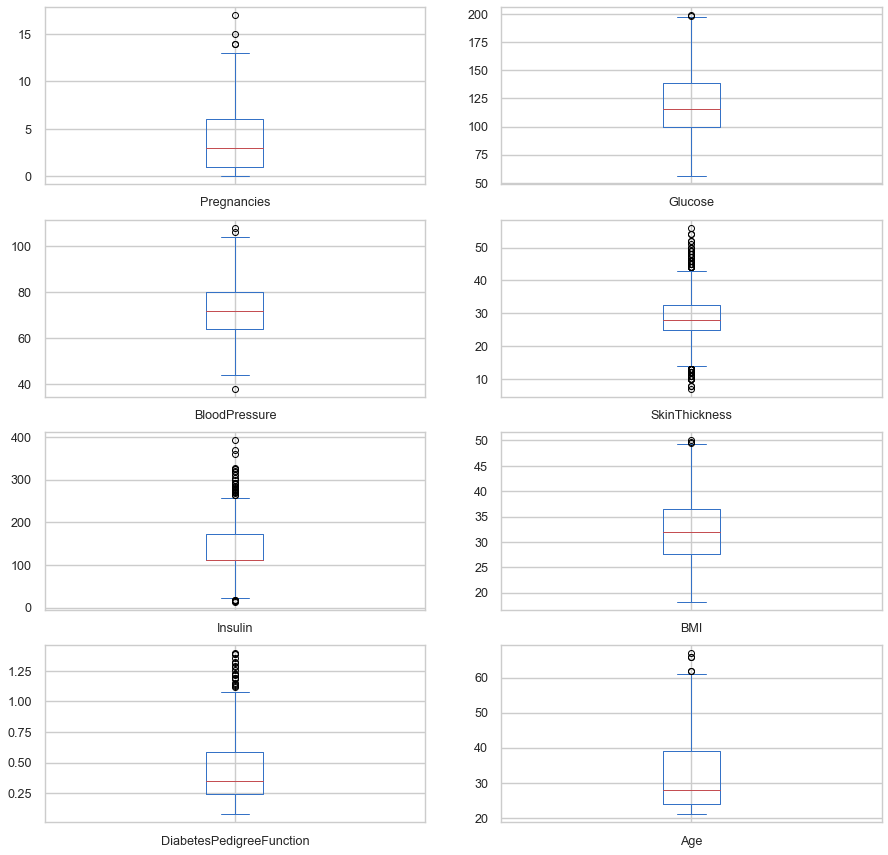

In [33]:
#Box plot after imputation
predictors.plot(subplots=True, layout=(4, 2),
                figsize=(15, 15), kind="box", sharex=False)


In [34]:
# Rechecking if the outcome is independent of the Diabetes Pedigree function after pre-processing the predictors
chi_scores = chi2(df[['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age']], df['Outcome'])


In [35]:
chi_scores


(array([ 160.06281659, 1679.25611305,   51.90977064,  179.6076452 ,
        4999.62969623,   94.04699604,    6.76274996,  336.47894515]),
 array([1.09628554e-36, 0.00000000e+00, 5.81105297e-13, 5.90320401e-41,
        0.00000000e+00, 3.08120648e-22, 9.30802100e-03, 3.72996954e-75]))

In [36]:
p_values = pd.Series(chi_scores[1], index=predictors.columns)
p_values.sort_values(ascending=False, inplace=True)


<AxesSubplot:>

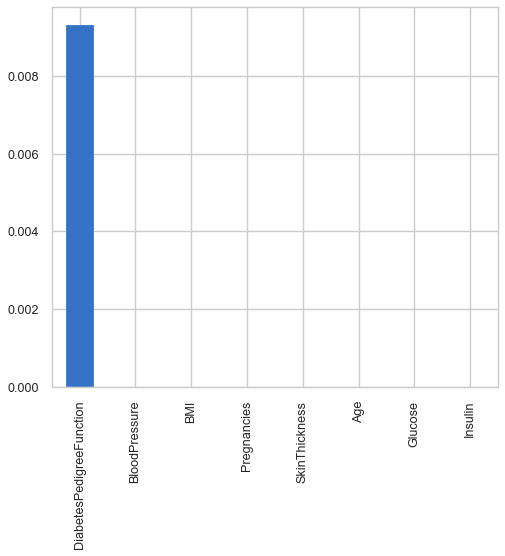

In [37]:
p_values.plot.bar()


Oh interesting. The outcome is in fact not independent of the Diabetes Pedigree Function anymore. We see that Diabetes Pedigree Function which had a p-value of greater than 0.05 earlier has now decreased to about 0.009. Therefore, one might have made wrong conclusions about significance of that predictor variable.

***
## Section: 3.2 - Did you decide to implement any freature transformations? If so, why?
-  If you decided you wanted to change any features, describe why and how and for what purposes. Feel free (though not required) to use mathematical notation where appropriate after providing an explanation.
***

Yes, I decided to apply a Quantile transform as the different features have a widely different spread of values. Many machine learning algorithms that use Euclidean distance as a metric to calculate the similarities will fail to give a reasonable recognition to features with smaller variance, in this case, the Diabetes Pedigree Function, which in the real case can turn out to be an actually important metric. Quantile transform transforms the features to follow a uniform or a normal distribution. Therefore, for a given feature, this transformation tends to spread out the most frequent values. It also reduces the impact of (marginal) outliers. https://www.analyticsvidhya.com/blog/2021/05/feature-scaling-techniques-in-python-a-complete-guide/

In [38]:
scaler = QuantileTransformer(n_quantiles=500)
df_transformed = df.copy()
def scaleColumns(df, cols_to_scale):
    for col in cols_to_scale:
        df[col] = pd.DataFrame(scaler.fit_transform(pd.DataFrame(df[col])),columns=[col])
    return df

cols_to_scale = ['Glucose',	'BloodPressure', 'SkinThickness', 	'DiabetesPedigreeFunction']

scaleColumns(df_transformed, cols_to_scale)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
2,5,0.204409,0.331663,0.033066,111.199262,36.0,0.794743,27.0,0
3,3,0.325651,0.228457,0.917836,85.000000,29.5,0.115433,25.0,0
4,2,0.367735,0.402806,0.589178,49.000000,21.1,0.823478,26.0,0
5,0,0.367735,0.980818,0.589178,142.000000,41.5,0.100200,22.0,0
7,4,0.475952,0.914830,0.403808,111.199262,28.5,0.261484,37.0,0
...,...,...,...,...,...,...,...,...,...
775,10,0.614228,0.712425,0.589178,172.231061,45.6,0.729706,38.0,1
776,10,0.985972,0.331663,0.507014,115.000000,31.1,0.878095,41.0,1
780,0,0.737475,0.610220,0.703407,172.231061,36.3,0.946628,25.0,1
781,4,0.961131,0.610220,0.703407,172.231061,28.4,0.194326,36.0,1


***
## Section: 3.3 - Did you decide to create any new features? If so, why?
-  If you decided you wanted to create any features, describe why and how and for what purposes. Feel free (though not required) to use mathematical notation where appropriate after providing an explanation.
***

I created four new predictor variables based on the pairs that had a relatively high degree of correlation between them as seen in the correlation plot above. I took their ratios as a set of 4 new variables: N0, N1, N2, N3


In [39]:
df_transformed['N0'] = df_transformed['SkinThickness'] / df_transformed['BMI']

df_transformed['N1'] = df_transformed['SkinThickness'] / df_transformed['Insulin']

df_transformed['N2'] = df_transformed['Glucose']/df_transformed['Insulin']

df_transformed['N3'] =  df_transformed['Pregnancies']/df_transformed['Age']


In [40]:
predictors_transformed = df_transformed.drop('Outcome',axis=1)

outcome_transformed = df_transformed[["Outcome"]]


***
## Section: 3.4 - Fit a logistic regression model using the data before any transformations or additions (e.g., the data at the end of section 3.2)
- Here we want to evaluate the model. Given an interpretation and an analysis.

### Output:
- Show the model output, coefficients, p-values and other relevant statistical information.
- Provide the odds ratios of the significant parameters as well as an interpretation of that odd's ratio. Be sure to mention what level of significance you are using.
- Assuming you use a cuttoff of $\pi_i > 0.5$ when classifying diabetes what is your misclassification table.
- Assuming you use a cutoff of $\pi_i > 0.75$ when classifying diabetes what is your misclassification table.

> Bonus: Plot an ROC curve and describe it. 
***

In [41]:
reg = sm.Logit(outcome, predictors).fit()
print(reg.summary())


Optimization terminated successfully.
         Current function value: 0.505251
         Iterations 6
                           Logit Regression Results                           
Dep. Variable:                Outcome   No. Observations:                  783
Model:                          Logit   Df Residuals:                      775
Method:                           MLE   Df Model:                            7
Date:                Mon, 19 Sep 2022   Pseudo R-squ.:                  0.2186
Time:                        22:30:26   Log-Likelihood:                -395.61
converged:                       True   LL-Null:                       -506.30
Covariance Type:            nonrobust   LLR p-value:                 3.374e-44
                               coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------
Pregnancies                  0.1160      0.032      3.648      0.000       0.054

In [42]:
#Code credits; https://www.andrewvillazon.com/logistic-regression-python-statsmodels/
odds_ratios = pd.DataFrame(
    {
        "OR": reg.params,
        "Lower CI": reg.conf_int(alpha=0.05)[0],
        "Upper CI": reg.conf_int(alpha=0.05)[1],
    }
)
odds_ratios = np.exp(odds_ratios)
print(odds_ratios)


                                OR  Lower CI  Upper CI
Pregnancies               1.122945  1.055114  1.195138
Glucose                   1.015692  1.008665  1.022767
BloodPressure             0.928123  0.913466  0.943015
SkinThickness             1.027896  1.001744  1.054730
Insulin                   1.015839  1.011385  1.020311
BMI                       0.959291  0.928299  0.991318
DiabetesPedigreeFunction  2.209447  1.139981  4.282226
Age                       1.016755  0.995669  1.038287


We are using a significance level of 95% confidence interval. This can be adjusted using the alpha parameter.

In [43]:
# Misclassification table
yhat = reg.predict(predictors)
#Credits to Greg's notes
def table(predicted_probs, labels, cutoff):
    """ Replacement for R's table funcion. """
    predicted_outcome = (predicted_probs > cutoff).astype(int)
    df = pd.DataFrame(
        {"predicted_outcome": predicted_outcome, "actual_outcome": labels})
    return pd.crosstab(index=df["actual_outcome"], columns=df["predicted_outcome"], margins=False)

In [44]:
#With cutoff=0.5
table(yhat, outcome.values.reshape(-1), cutoff=0.5)

predicted_outcome,0,1
actual_outcome,,
0,441,69
1,106,167


In [45]:
#With cutoff=0.75
table(yhat, outcome.values.reshape(-1), cutoff=0.75)

predicted_outcome,0,1
actual_outcome,,
0,490,20
1,204,69


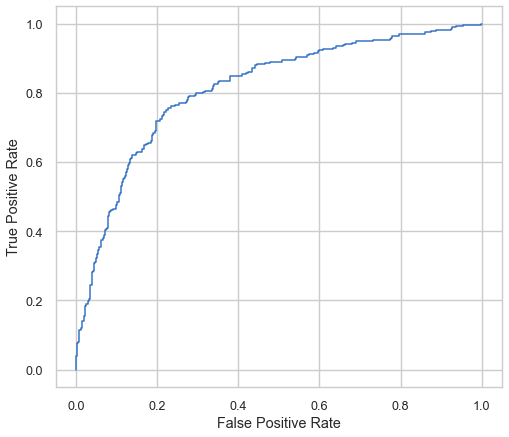

In [46]:
fpr, tpr, _ = roc_curve(outcome,  yhat)

#create ROC curve
plt.plot(fpr, tpr)
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()


The closer the curve is to the top left corner, the better our model is performing.

***
## Section: 3.5 - Fit a logistic regression model using the data after your feature transformations and new variables. 
- Here we want to see if you were able to discover features that led to an improve moodel

### Output:
- Show the model output, coefficients, p-values and other relevant statistical information.
- Provide the odds ratios of the significant parameters as well as an interpretation of that odd's ratio. Be sure to mention what level of significance you are using.
- Assuming you use a cuttoff of $\pi_i > 0.5$ when classifying diabetes what is your misclassification table.
- Assuming you use a cutoff of $\pi_i > 0.75$ when classifying diabetes what is your misclassification table.

> Bonus: Plot an ROC curve and describe it. 

***

In [47]:
reg = sm.Logit(outcome_transformed, predictors_transformed).fit()
print(reg.summary())


Optimization terminated successfully.
         Current function value: 0.458657
         Iterations 9
                           Logit Regression Results                           
Dep. Variable:                Outcome   No. Observations:                  783
Model:                          Logit   Df Residuals:                      771
Method:                           MLE   Df Model:                           11
Date:                Mon, 19 Sep 2022   Pseudo R-squ.:                  0.2907
Time:                        22:30:26   Log-Likelihood:                -359.13
converged:                       True   LL-Null:                       -506.30
Covariance Type:            nonrobust   LLR p-value:                 1.364e-56
                               coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------
Pregnancies                  0.5325      0.119      4.463      0.000       0.299

In [48]:
#Code credits; https://www.andrewvillazon.com/logistic-regression-python-statsmodels/
odds_ratios = pd.DataFrame(
    {
        "OR": reg.params,
        "Lower CI": reg.conf_int(alpha=0.05)[0],
        "Upper CI": reg.conf_int(alpha=0.05)[1],
    }
)
odds_ratios = np.exp(odds_ratios)
print(odds_ratios)


                                     OR       Lower CI      Upper CI
Pregnancies                1.703119e+00   1.347988e+00  2.151811e+00
Glucose                    5.105506e-01   1.962805e-01  1.328007e+00
BloodPressure              1.287517e+00   6.738002e-01  2.460225e+00
SkinThickness              1.916019e+04   1.083372e+03  3.388614e+05
Insulin                    1.024179e+00   1.017110e+00  1.031297e+00
BMI                        8.976704e-01   8.639140e-01  9.327459e-01
DiabetesPedigreeFunction   6.160936e-01   3.291575e-01  1.153160e+00
Age                        9.906729e-01   9.640029e-01  1.018081e+00
N0                        1.504390e-128  2.793994e-166  8.100196e-91
N1                         4.174892e-53  1.865883e-132  9.341276e+26
N2                         2.357813e+36   2.408024e+02  2.308649e+70
N3                         9.900046e-08   3.208228e-11  3.054986e-04


In [49]:
yhat = reg.predict(predictors_transformed)


In [50]:
table(yhat, outcome_transformed.values.reshape(-1), cutoff=0.5)


predicted_outcome,0,1
actual_outcome,,
0,453,57
1,91,182


In [51]:
table(yhat, outcome_transformed.values.reshape(-1), cutoff=0.75)


predicted_outcome,0,1
actual_outcome,,
0,486,24
1,192,81


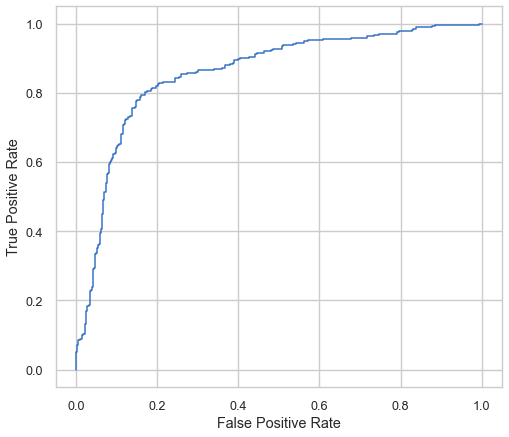

In [52]:
fpr, tpr, _ = roc_curve(outcome_transformed,  yhat)

#create ROC curve
plt.plot(fpr, tpr)
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()


***
# Section: 4 - Conclusions
- What are your overall conclusions about the data?
- What did you learn? What would you explore further with additional data, time or resources. What might "future research" require to gain deeper insight? 
***

- From the raw dataset we retrieve a balanced, scaled and correct number of samples, that we later explored the mechanics regulating its features. We will explore all these results to build a robust detection system. We find that Diabetes Pedigree Function has the largest Odds ratio in the case without additional parameters.

For future work, the accuracy may be enhanced by using suitable pre-processing techniques for data management and analysis. The same method could be considered and many other machine learning classifiers algorithms could be considered to compare the most accurate one. There are various other combinations of predictor variables and Scaler function that can be experimented with.